**Here we are going to perform a EDA on a University Ranking dataset. This University Ranking Analysis tells us about the performances of different institutes across the world. How much the universities perform over years, if there is any outliers or not, the top 10 universities, the correlation between world rank and citation. All of these we will learn with this dataset.**

First, We will import the libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore', category=Warning)

After that we will read the dataset with the help of pandas.

In [2]:
df = pd.read_csv('/kaggle/input/world-university-rankings/cwurData.csv')

We will see the head 5 rows

In [3]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


**Is there any null values in the dataset?**

In [4]:
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

**A quick summarization**

In [5]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2200.00,2000.00,2200.00,2200.00,2200.00
mean,459.59,40.28,275.10,357.12,178.89,459.91,459.80,413.42,496.70,433.35,47.80,2014.32
std,304.32,51.74,121.94,186.78,64.05,303.76,303.33,264.37,286.92,274.00,7.76,0.76
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,43.36,2012.00
25%,175.75,6.00,175.75,175.75,175.75,175.75,175.75,161.00,250.50,170.75,44.46,2014.00
50%,450.50,21.00,355.00,450.50,210.00,450.50,450.50,406.00,496.00,426.00,45.10,2014.00
75%,725.25,49.00,367.00,478.00,218.00,725.00,725.25,645.00,741.00,714.25,47.55,2015.00
max,1000.00,229.00,367.00,567.00,218.00,1000.00,991.00,812.00,1000.00,871.00,100.00,2015.00


**How many rows and columns are there?**

In [6]:
df.shape

(2200, 14)

**What types of data the columns have??**

In [7]:
df.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

**Now we will perform the visualization**

This line of codes will create a bar chart which shows the top 10 countries by number of ranked universities. Matplotlib library is used.

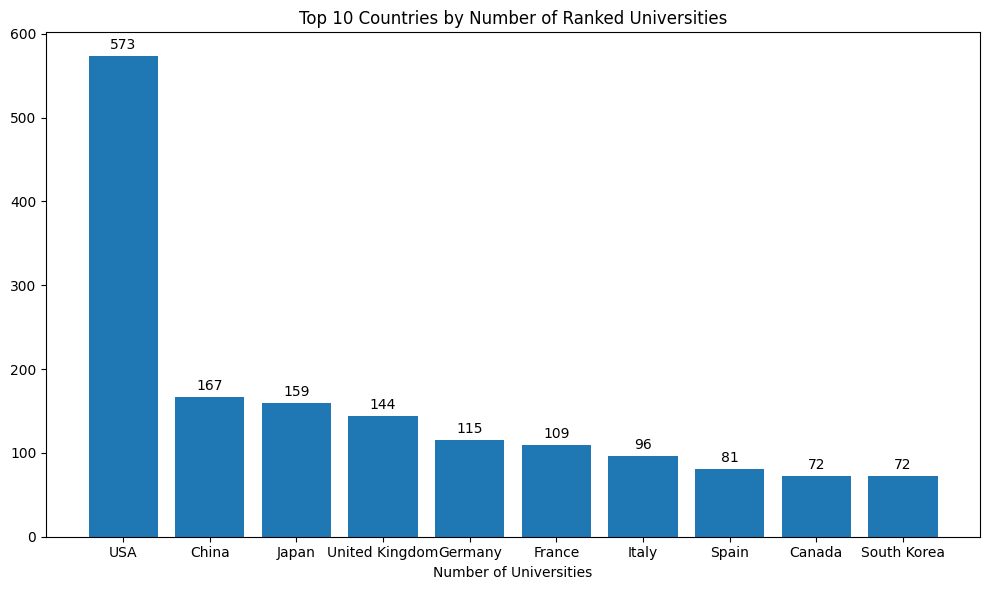

In [8]:
country_counts = df['country'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(country_counts.head(10).index, country_counts.head(10).values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom')

plt.xlabel("Number of Universities")
plt.title("Top 10 Countries by Number of Ranked Universities")
plt.tight_layout()
plt.show()

This shows the top 10 countries by average world rank.

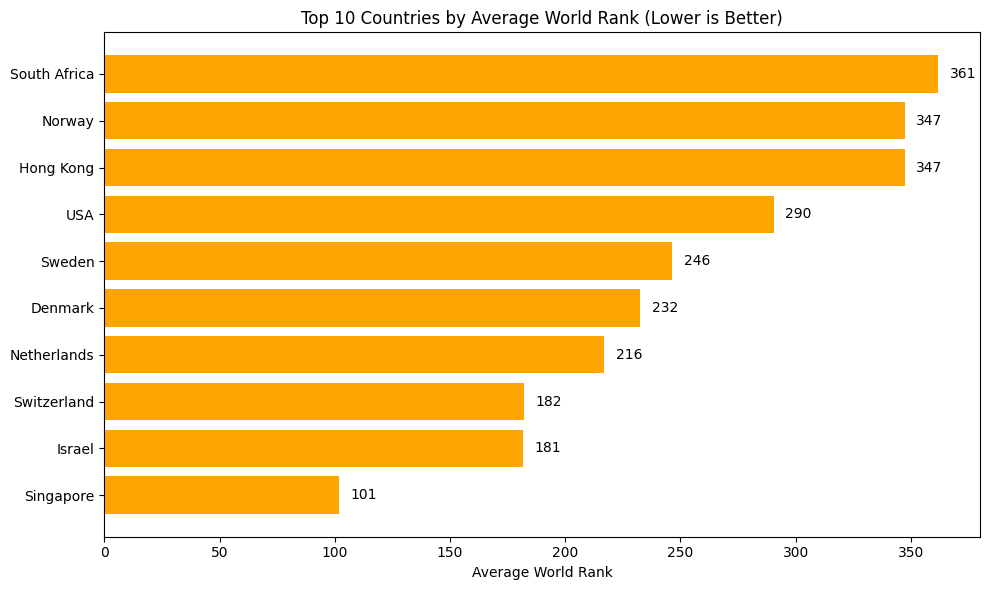

In [9]:
avg_world_rank = df.groupby('country')['world_rank'].mean()
top_10_avg_rank = avg_world_rank.sort_values().head(10)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_avg_rank.index, top_10_avg_rank.values, color='orange')

for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, 
             f'{int(bar.get_width())}', ha='left', va='center')

plt.xlabel("Average World Rank")
plt.title("Top 10 Countries by Average World Rank (Lower is Better)")
plt.tight_layout()
plt.show()

This line of codes help us understand the ranking trends over time. Seaborn library is used here to visua

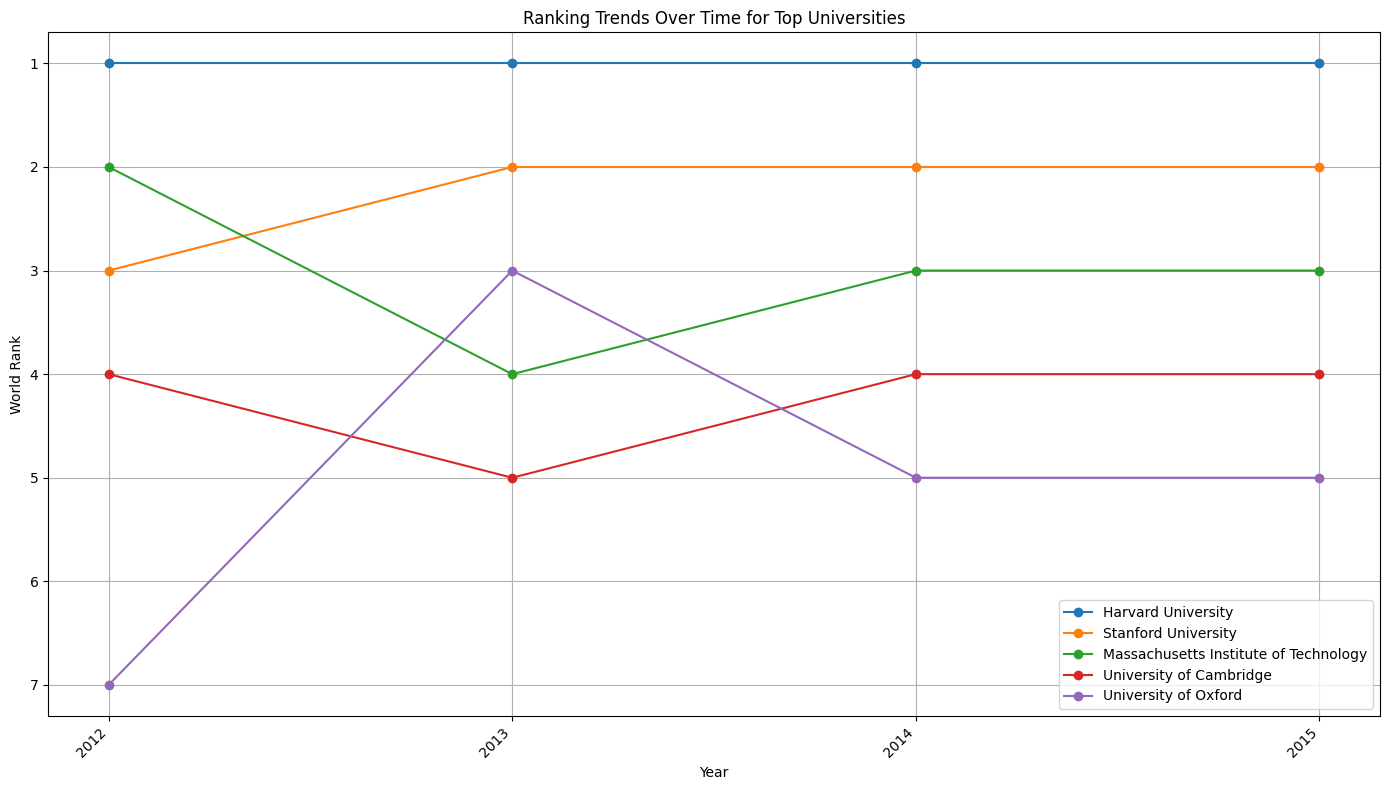

In [10]:
# top N universities based on latest year
latest_year = df['year'].max()
top_universities = df[df['year'] == latest_year].nsmallest(5, 'world_rank')['institution']
filtered_df = df[df['institution'].isin(top_universities)]

# Plotting trends
plt.figure(figsize=(14, 8))

for uni in top_universities:
    uni_data = filtered_df[filtered_df['institution'] == uni].sort_values('year')
    plt.plot(uni_data['year'], uni_data['world_rank'], marker='o', label=uni)

plt.gca().invert_yaxis()  # Lower rank is better
plt.title('Ranking Trends Over Time for Top Universities')
plt.xlabel('Year')
plt.ylabel('World Rank')

plt.xticks(rotation=45, ha='right')
plt.xticks(range(int(filtered_df['year'].min()), int(filtered_df['year'].max()) + 1))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This is a scatter plot + regression line chart. This chart is showing the correlation between world rank and citations. Citations mean how useful an university's research work globally. Here lower correlation number means the citation is influential.

Correlation between World Rank and Citations: 0.857


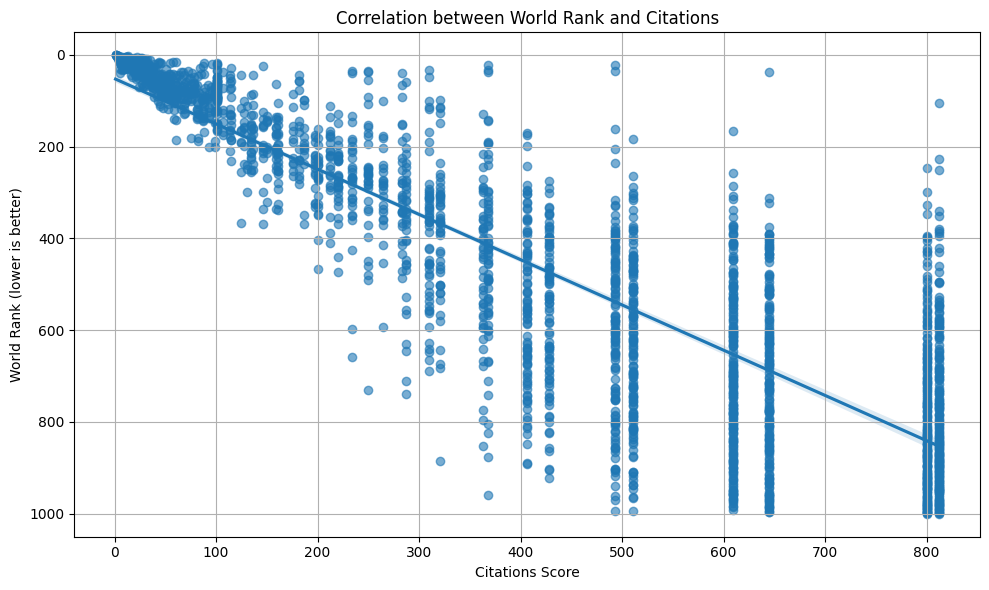

In [11]:
# Compute correlation
correlation = df['world_rank'].corr(df['citations'])
print(f"Correlation between World Rank and Citations: {correlation:.3f}")

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='citations', y='world_rank', data=df, scatter_kws={'alpha':0.6})
plt.title('Correlation between World Rank and Citations')
plt.xlabel('Citations Score')
plt.ylabel('World Rank (lower is better)')
plt.gca().invert_yaxis()  # Because lower ranks are better
plt.grid(True)
plt.tight_layout()
plt.show()

These are the top 10 universities with sharpest rank drop.

In [12]:
#earliest and latest ranks for each university
first = df.sort_values('year').groupby('institution').first()
last = df.sort_values('year').groupby('institution').last()

# rank drop
rank_change = (last['world_rank'] - first['world_rank']).sort_values(ascending=False)

print(rank_change.head(10))

institution
Osaka City University              324
Dankook University                 233
Cranfield University               197
University of Hull                 189
Yokohama National University       179
Chung Yuan Christian University    179
University of Málaga               174
Kobe University                    167
University of Science, Malaysia    167
Sogang University                  153
Name: world_rank, dtype: int64


**Summary** 
This EDA explored global university rankings to uncover patterns and insights. We analyzed top countries by number and average rank of universities, tracked ranking trends over time. Key quality indicator like citation impact was examined, showing a strong link between citations and better rankings. Top universities with sharpest fall was also investigated. Overall, the analysis highlighted how research output, institutional type, and geography influence global rankings, providing a clear view of what drives excellence in higher education.